In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('always')

In [46]:
df = pd.read_csv('../Dataset/kendaraan_train_clean.csv')
df.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
106544,0,0.076923,1.0,0.500000,1.0,0,0,0.386983,0.932099,0.290657,0
225604,0,0.169231,1.0,0.961538,1.0,0,0,0.608018,0.932099,0.847751,0
126421,0,0.046154,1.0,0.538462,1.0,0,0,0.592904,0.932099,0.692042,0
88170,1,0.276923,1.0,0.538462,1.0,1,0,0.000000,0.981481,0.034602,0
228989,1,0.287765,1.0,0.480769,0.0,0,1,0.442018,0.932099,0.204152,0


In [47]:
df_test = pd.read_csv('../Dataset/kendaraan_test_clean.csv')
df_test.sample(5)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
44067,1,0.661538,1,0.538462,1,1,0,0.067555,0.759259,0.262976,0
25422,0,0.107692,1,0.403846,1,0,0,0.065300,0.932099,0.923875,0
2188,1,0.092308,1,0.211538,0,0,1,0.053022,0.962963,0.951557,0
37822,1,0.061538,1,0.153846,1,1,0,0.070516,0.759259,0.941176,0
38078,0,0.046154,1,0.538462,0,1,1,0.111755,0.759259,0.667820,1


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

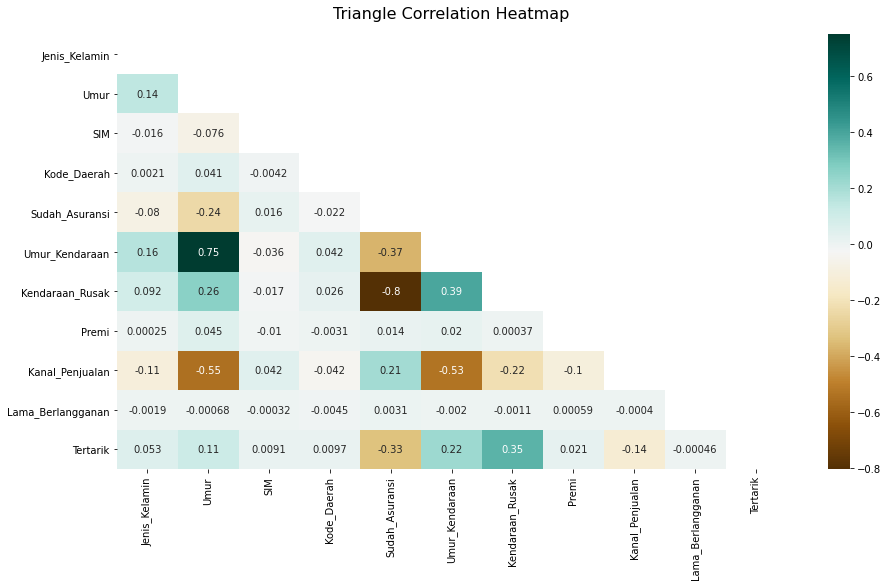

In [48]:
plt.figure(figsize=(15, 8))

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize': 16}, pad=16)

0    209629
1     29049
Name: Tertarik, dtype: int64


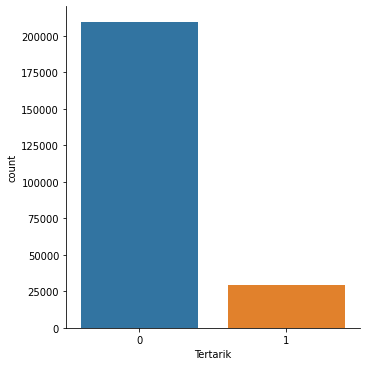

In [49]:
print(df['Tertarik'].value_counts())
sns.catplot(x='Tertarik', data=df, kind='count')

In [50]:
x_data = df.drop("Tertarik", axis=1)
y_data = df["Tertarik"]

In [51]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2)

print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print('---------------------------------')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


x_train shape: (190942, 10)
x_test shape: (47736, 10)
---------------------------------
y_train shape: (190942,)
y_test shape: (47736,)


## **Tuning Model**

In [52]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB


In [53]:
classifier = [
    DecisionTreeClassifier(random_state=42, splitter="random"),
    LogisticRegression(max_iter=2000),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    RandomForestClassifier(),
    SGDClassifier(loss="hinge", penalty="l2"),
    GaussianNB()
]

name = [
    'Decision Tree',
    'Logistic Regression',
    'Gradient Boosting', 
    'AdaBoost',
    'Random Forest',
    'Stochastic Gradient Descent',
    'Naive Bayes'
]


In [54]:
def accuracy(model, name):
    print(f"Akurasi model {name}: {round(model.score(x_test, y_test) * 100, 2)}")


In [55]:
for models, i in zip(classifier, name):
    models.fit(x_train, y_train)
    accuracy(models, i)


Akurasi model Decision Tree: 82.09
Akurasi model Logistic Regression: 87.75
Akurasi model Gradient Boosting: 87.75
Akurasi model AdaBoost: 87.72
Akurasi model Random Forest: 86.74
Akurasi model Stochastic Gradient Descent: 87.74
Akurasi model Naive Bayes: 68.83


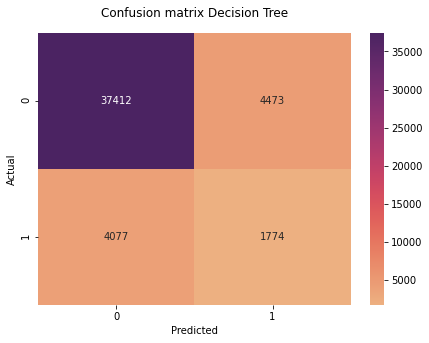


               precision    recall  f1-score   support

           0       0.90      0.89      0.90     41885
           1       0.28      0.30      0.29      5851

    accuracy                           0.82     47736
   macro avg       0.59      0.60      0.60     47736
weighted avg       0.83      0.82      0.82     47736




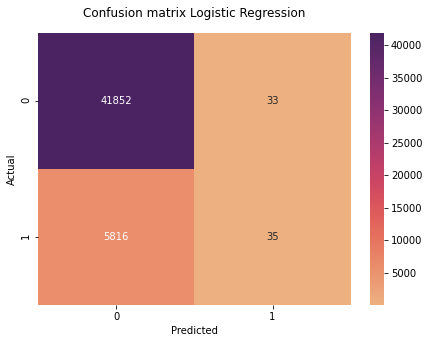


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41885
           1       0.51      0.01      0.01      5851

    accuracy                           0.88     47736
   macro avg       0.70      0.50      0.47     47736
weighted avg       0.83      0.88      0.82     47736




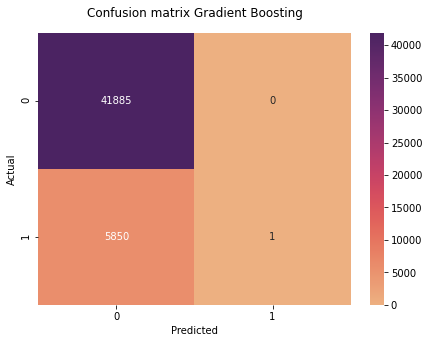


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41885
           1       1.00      0.00      0.00      5851

    accuracy                           0.88     47736
   macro avg       0.94      0.50      0.47     47736
weighted avg       0.89      0.88      0.82     47736




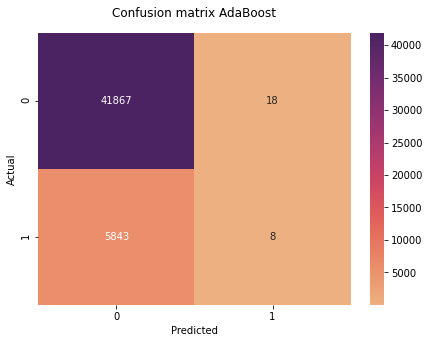


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41885
           1       0.31      0.00      0.00      5851

    accuracy                           0.88     47736
   macro avg       0.59      0.50      0.47     47736
weighted avg       0.81      0.88      0.82     47736




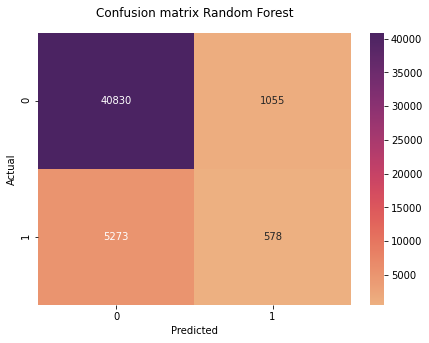


               precision    recall  f1-score   support

           0       0.89      0.97      0.93     41885
           1       0.35      0.10      0.15      5851

    accuracy                           0.87     47736
   macro avg       0.62      0.54      0.54     47736
weighted avg       0.82      0.87      0.83     47736




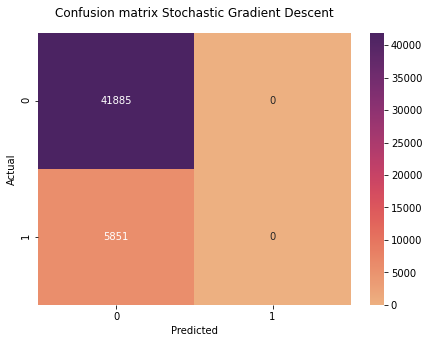

C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41885
           1       0.00      0.00      0.00      5851

    accuracy                           0.88     47736
   macro avg       0.44      0.50      0.47     47736
weighted avg       0.77      0.88      0.82     47736




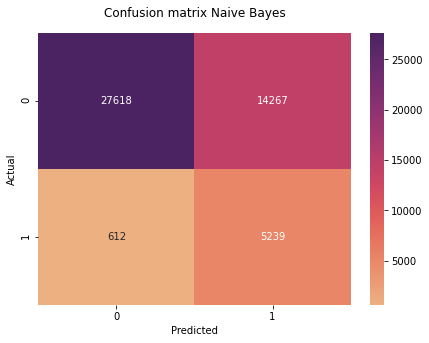


               precision    recall  f1-score   support

           0       0.98      0.66      0.79     41885
           1       0.27      0.90      0.41      5851

    accuracy                           0.69     47736
   macro avg       0.62      0.78      0.60     47736
weighted avg       0.89      0.69      0.74     47736




In [56]:
from sklearn.metrics import confusion_matrix, classification_report

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')
    
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)

## **Validation Test**

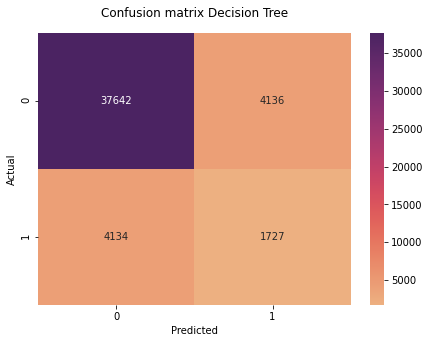


               precision    recall  f1-score   support

           0       0.90      0.90      0.90     41778
           1       0.29      0.29      0.29      5861

    accuracy                           0.83     47639
   macro avg       0.60      0.60      0.60     47639
weighted avg       0.83      0.83      0.83     47639




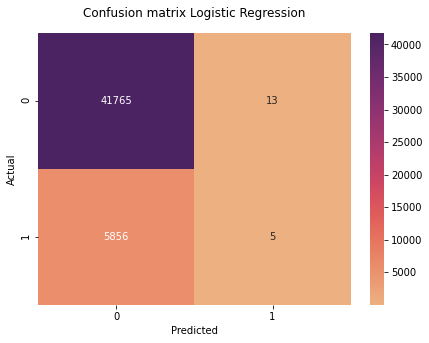


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.28      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.58      0.50      0.47     47639
weighted avg       0.80      0.88      0.82     47639




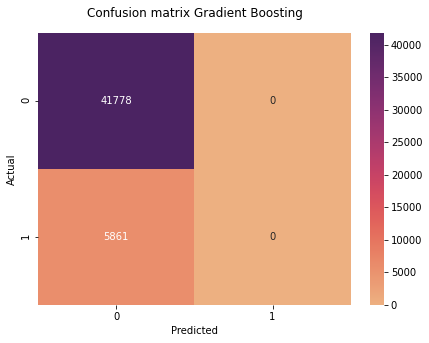

C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639




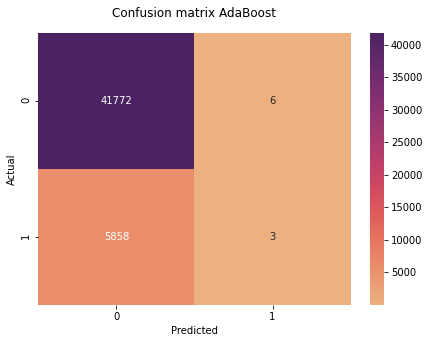


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.33      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.61      0.50      0.47     47639
weighted avg       0.81      0.88      0.82     47639




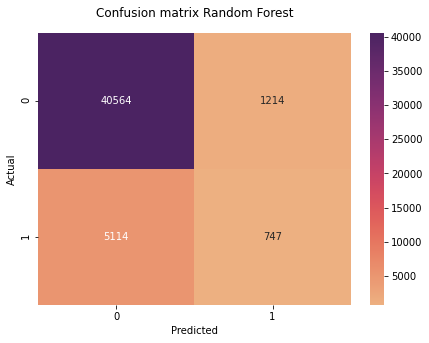


               precision    recall  f1-score   support

           0       0.89      0.97      0.93     41778
           1       0.38      0.13      0.19      5861

    accuracy                           0.87     47639
   macro avg       0.63      0.55      0.56     47639
weighted avg       0.83      0.87      0.84     47639




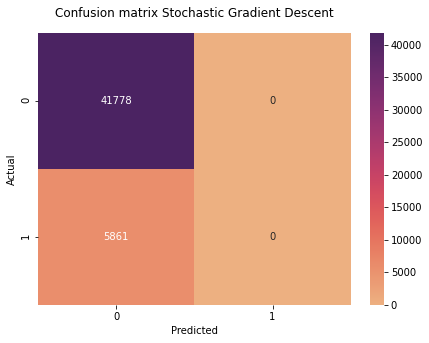

C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ShinyQ\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,


               precision    recall  f1-score   support

           0       0.88      1.00      0.93     41778
           1       0.00      0.00      0.00      5861

    accuracy                           0.88     47639
   macro avg       0.44      0.50      0.47     47639
weighted avg       0.77      0.88      0.82     47639




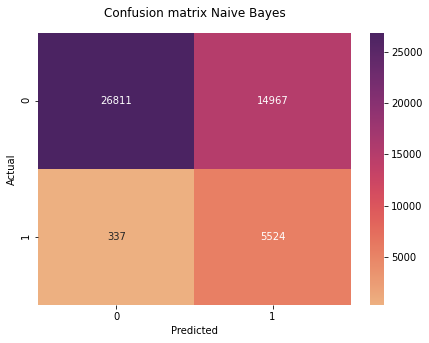


               precision    recall  f1-score   support

           0       0.99      0.64      0.78     41778
           1       0.27      0.94      0.42      5861

    accuracy                           0.68     47639
   macro avg       0.63      0.79      0.60     47639
weighted avg       0.90      0.68      0.73     47639




In [57]:
x_test = df_test.drop("Tertarik", axis=1)
y_test = df_test["Tertarik"]

def report(model, title):
    result = model.predict(x_test)

    conf_matrix = confusion_matrix(y_test, result)
    plt.figure(figsize=(7, 5))
    sns.heatmap(conf_matrix, annot=True, xticklabels=[0, 1], yticklabels=[0, 1], cmap='flare', fmt='d')

    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title(f'Confusion matrix {title}', pad=16)
    plt.show()

    print("\n", classification_report(y_test, result), end="\n\n")


for models, i in zip(classifier, name):
    report(models, i)
